## Necessary libraries



In [670]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Load data


In [673]:
air_train = pd.read_csv("./air-quality-prediction/train.csv", encoding="ISO-8859-1")
air_test =  pd.read_csv("./air-quality-prediction/test.csv", encoding="ISO-8859-1")
air_train.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,38.8,92.5,8.3,29.0,32.8,8.3,2.19,3.9,698,Hazardous
1,26.3,54.1,0.9,10.3,25.1,4.5,0.95,10.1,316,Good
2,37.2,111.3,0.2,8.8,31.9,18.5,2.12,7.7,753,Poor
3,17.5,57.2,8.7,13.6,25.6,3.1,1.03,11.6,505,Good
4,26.7,54.8,5.8,11.3,15.8,4.5,1.25,11.8,565,Good


## Cleaning data 

In [676]:
air_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4000 non-null   float64
 1   Humidity                       4000 non-null   float64
 2   PM2.5                          4000 non-null   float64
 3   PM10                           4000 non-null   float64
 4   NO2                            4000 non-null   float64
 5   SO2                            4000 non-null   float64
 6   CO                             4000 non-null   float64
 7   Proximity_to_Industrial_Areas  4000 non-null   float64
 8   Population_Density             4000 non-null   int64  
 9   Air Quality                    4000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 312.6+ KB


In [678]:
print(air_train['Air Quality'].value_counts())

Air Quality
Good         1591
Moderate     1206
Poor          814
Hazardous     389
Name: count, dtype: int64


### remove negative values

In [681]:
columns_to_check =['Humidity', 'PM2.5', 'PM10', 'NO2','SO2', 'CO', 'Proximity_to_Industrial_Areas','Population_Density']

air_train = air_train[(air_train[columns_to_check] >= 0).all(axis=1)]
air_train

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,38.8,92.5,8.3,29.0,32.8,8.3,2.19,3.9,698,Hazardous
1,26.3,54.1,0.9,10.3,25.1,4.5,0.95,10.1,316,Good
2,37.2,111.3,0.2,8.8,31.9,18.5,2.12,7.7,753,Poor
3,17.5,57.2,8.7,13.6,25.6,3.1,1.03,11.6,505,Good
4,26.7,54.8,5.8,11.3,15.8,4.5,1.25,11.8,565,Good
...,...,...,...,...,...,...,...,...,...,...
3995,30.0,59.7,59.3,68.8,22.1,7.4,1.39,5.1,412,Moderate
3996,27.7,54.0,17.6,23.2,24.6,11.1,1.27,7.8,638,Moderate
3997,24.2,67.6,19.4,35.1,24.2,9.6,1.91,6.2,422,Poor
3998,21.4,76.4,15.3,22.1,12.4,3.4,0.96,16.3,420,Good


### outliers

In [684]:
Q1 = air_train['PM2.5'].quantile(0.25)
Q3 = air_train['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

air_train = air_train[(air_train['PM2.5'] >= lower_bound) & (air_train['PM2.5'] <= upper_bound)]
air_train

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,38.8,92.5,8.3,29.0,32.8,8.3,2.19,3.9,698,Hazardous
1,26.3,54.1,0.9,10.3,25.1,4.5,0.95,10.1,316,Good
2,37.2,111.3,0.2,8.8,31.9,18.5,2.12,7.7,753,Poor
3,17.5,57.2,8.7,13.6,25.6,3.1,1.03,11.6,505,Good
4,26.7,54.8,5.8,11.3,15.8,4.5,1.25,11.8,565,Good
...,...,...,...,...,...,...,...,...,...,...
3994,42.2,86.6,23.0,34.8,34.9,6.2,1.96,3.8,635,Poor
3996,27.7,54.0,17.6,23.2,24.6,11.1,1.27,7.8,638,Moderate
3997,24.2,67.6,19.4,35.1,24.2,9.6,1.91,6.2,422,Poor
3998,21.4,76.4,15.3,22.1,12.4,3.4,0.96,16.3,420,Good


# EDA


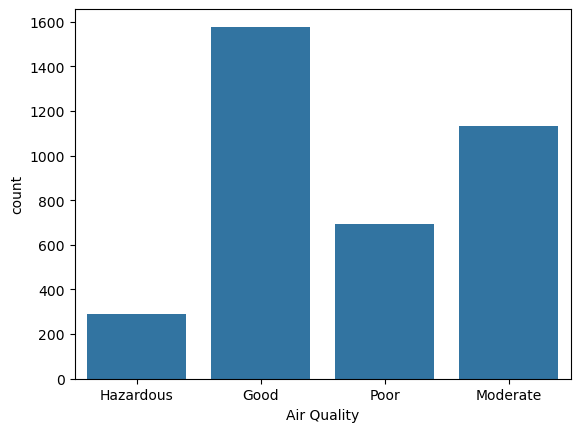

In [687]:
# to understand more my data
sns.countplot(x='Air Quality', data=air_train)
plt.show()

### PM2.5

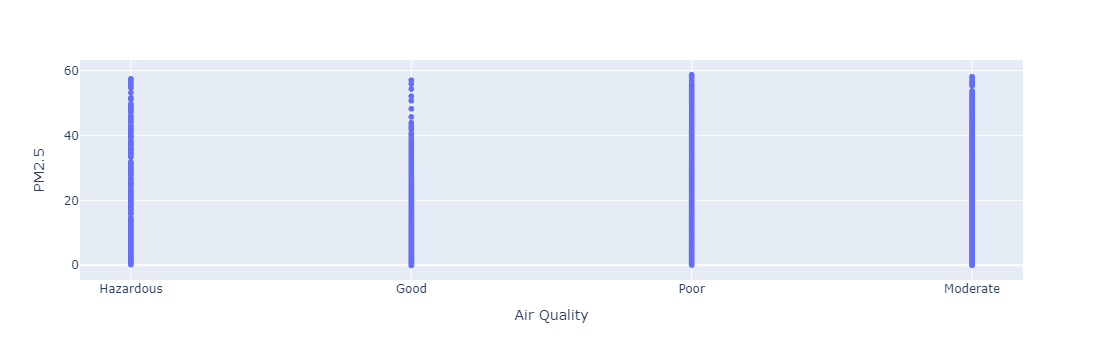

In [690]:
fig = px.scatter(air_train, x="Air Quality", y="PM2.5")
fig.show()

### PM10

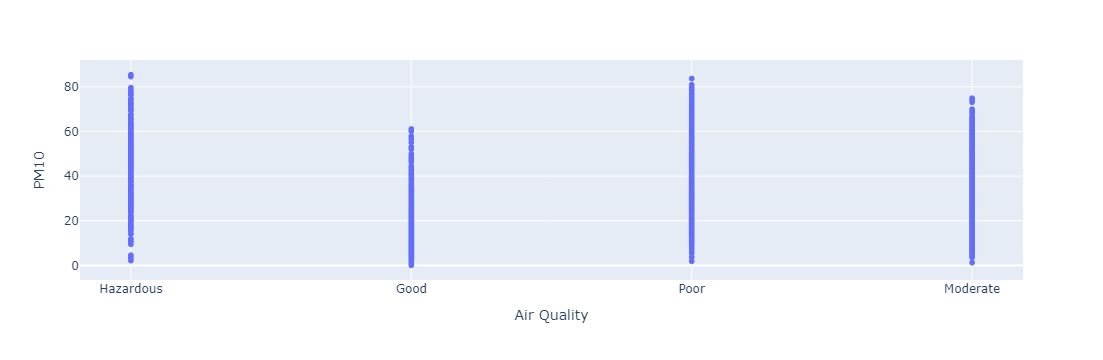

In [692]:
fig = px.scatter(air_train, x="Air Quality", y="PM10")
fig.show()

### N02

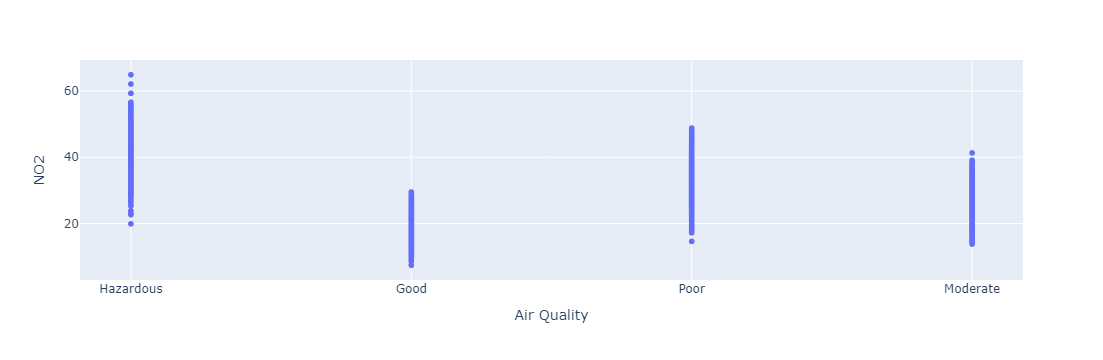

In [695]:
fig = px.scatter(air_train, x="Air Quality", y="NO2")
fig.show()

### CO

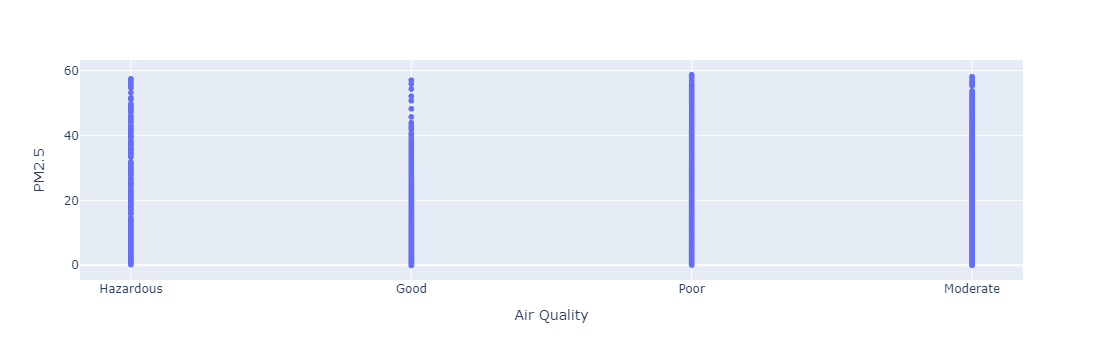

In [699]:
fig = px.scatter(air_train, x="Air Quality", y="PM2.5")
fig.show()

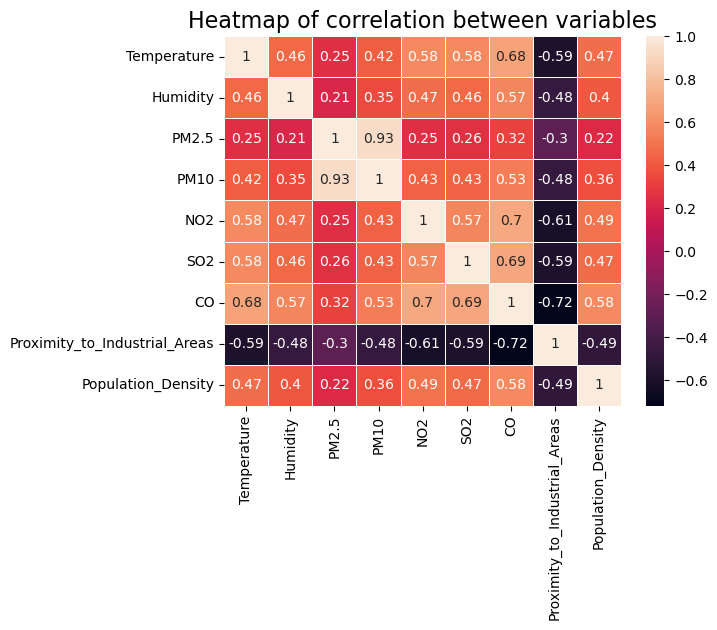

In [703]:
numeric_air_train = air_train.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_air_train.corr(), annot=True, linewidths=0.4)
plt.title('Heatmap of correlation between variables', fontsize=16)
plt.show() 


In [766]:
air_train.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [768]:
key_features = air_train[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']]

target_var = air_train ['Air Quality']

key_featurest = air_test[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density']]

### training


In [785]:
from sklearn.model_selection import train_test_split

Xtrain = key_features
Ytrain = target_var

Xtest = key_featurest

label_num = LabelEncoder()
Ytrain = label_num.fit_transform(Ytrain)

In [787]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
Xtrain_smote, Ytrain_smote = smote.fit_resample(Xtrain, Ytrain)

In [789]:
#The target variable represents distinct categories, so we use classification rather than regression

In [791]:
model = RandomForestClassifier(random_state=42)
model.fit(Xtrain_smote, Ytrain_smote)

predictions = model.predict(Xtest)
Ytrain = label_num.inverse_transform(Ytrain)
predictions = label_num.inverse_transform(predictions)

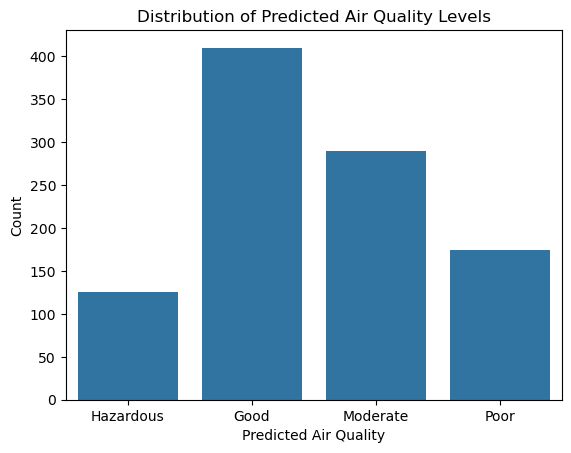

In [792]:
sns.countplot(x=predictions)
plt.xlabel("Predicted Air Quality")
plt.ylabel("Count")
plt.title("Distribution of Predicted Air Quality Levels")
plt.show()

In [793]:
air_test['Predicted Air Quality'] = predictions
air_test

,id,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Predicted Air Quality
0,0,31.3,73.4,72.8,88.8,54.1,17.1,2.54,2.6,755,Hazardous
1,1,24.0,68.8,0.8,8.6,20.9,2.4,1.16,10.5,235,Good
2,2,25.4,78.6,4.1,6.7,21.3,9.1,1.40,10.1,543,Moderate
3,3,30.7,102.0,7.9,26.1,41.6,26.1,2.31,4.8,765,Hazardous
4,4,26.5,54.1,12.3,15.3,20.3,5.3,0.99,12.7,374,Good
...,...,...,...,...,...,...,...,...,...,...,...
995,995,33.8,67.8,5.3,6.6,21.4,9.9,1.24,7.5,376,Moderate
996,996,22.6,61.0,18.8,25.7,15.0,2.2,1.02,14.7,298,Good
997,997,30.9,92.5,24.3,29.7,34.9,18.0,1.64,9.1,678,Poor
998,998,27.8,83.6,23.7,37.3,26.1,8.2,1.22,7.4,420,Moderate
